In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Basic concept of gradient descent

In [2]:
def plot_function(x0:float=None,
                  plot_direction:bool=False,
                  learning_rate:float=1.):
    # define a function
    x = np.linspace(-4, 4, 100)
    f = lambda x: x**2
    diff_f = lambda x: 2*x
    
    # assign value to the initial x
    if x0 is None:
        x0 = random.choice(x)
        
    # solve the slope function
    m = diff_f(x0)
    c = f(x0) - m*x0
    slope = lambda x: m*x+c
    
    # plot a graph
    plt.plot(x, f(x))
    plt.scatter(x0, f(x0), c='r')
     
    plt.plot(x, slope(x), linestyle='--')
    plt.xlim(-4, 4)
    plt.ylim(-0.5, 16)
    plt.title(f"$slope = {m:.2f}$", fontsize=14)
    
    if plot_direction and abs(m) > 0.3 :
        if m < 0:
            plt.arrow(x0, 0, -m*learning_rate-0.3, 0, head_width=0.5, head_length=0.3, width=0.2,  fc='k', ec='k')
        elif m > 0:
            plt.arrow(x0, 0, -m*learning_rate+0.3, 0, head_width=0.5, head_length=0.3,  width=0.2, fc='k', ec='k')
    return m*learning_rate

Let 
$$y = x^2$$

, where $x, y \in \mathbb{R}$

So the slope of $y$ is
$$m = \frac{dy}{dx} = 2x$$

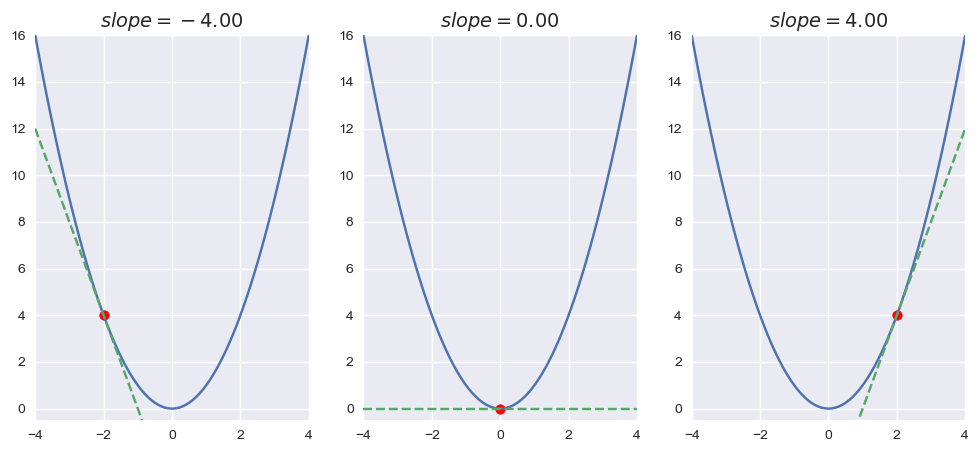

In [3]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plot_function(x0=-2)

plt.subplot(1, 3, 2)
plot_function(x0=0)

plt.subplot(1, 3, 3)
plot_function(x0=2)
plt.savefig('plot1.png')
plt.show()

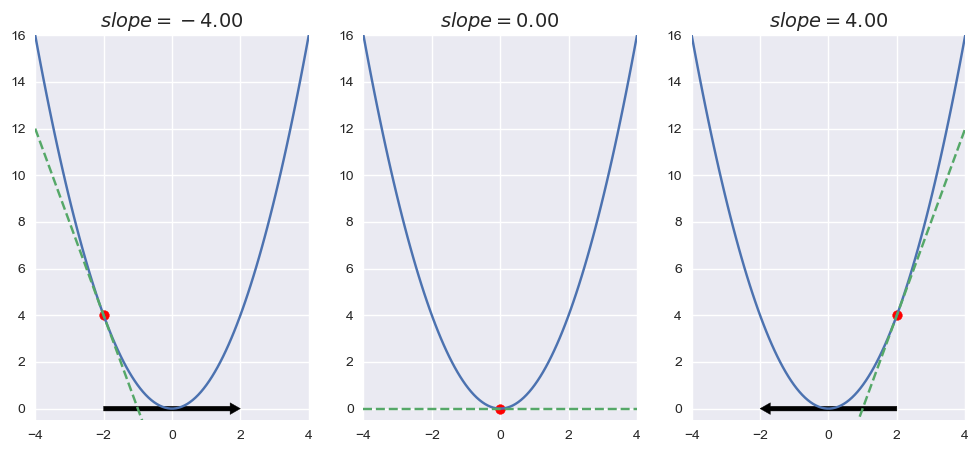

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plot_function(x0=-2, plot_direction=True)

plt.subplot(1, 3, 2)
plot_function(x0=0, plot_direction=True)

plt.subplot(1, 3, 3)
plot_function(x0=2, plot_direction=True)
plt.savefig('plot2.png')
plt.show()

How to minimize $y$ by $x$

$$x_{new} = x_{old} - m$$

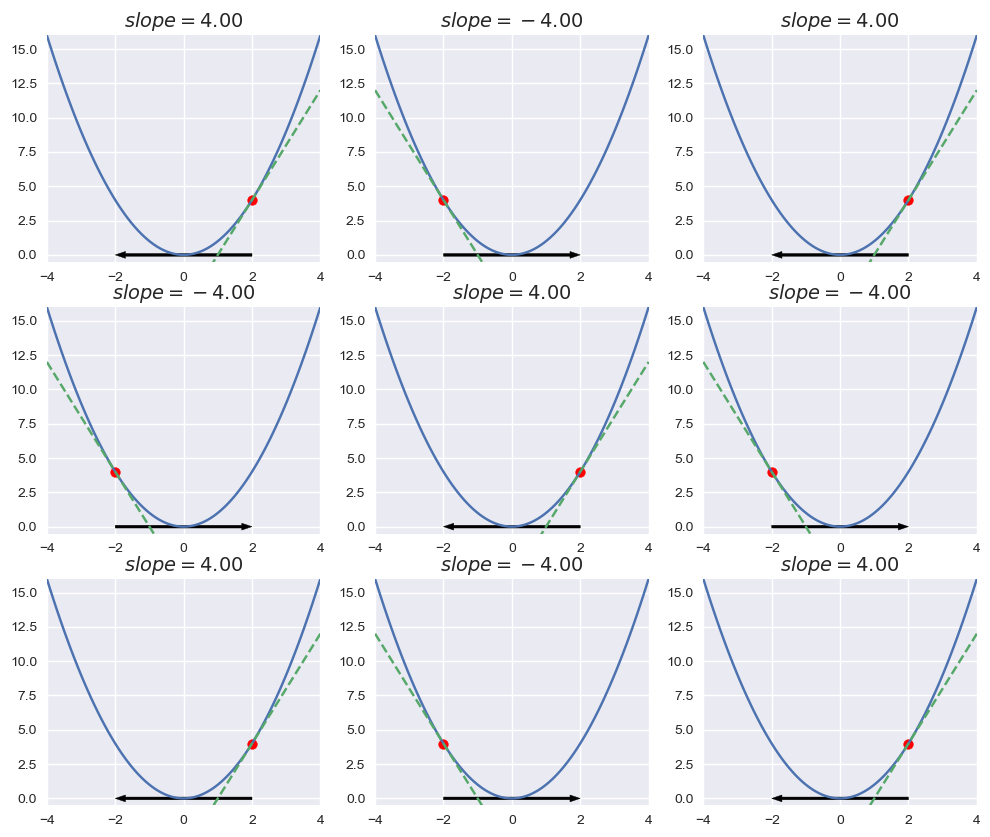

In [5]:
plt.figure(figsize=(12, 10))
m = 0
x_init = 2
for i in range(9):
    plt.subplot(3, 3, i+1)
    m = plot_function(x0=x_init, plot_direction=True)
    x_init = x_init - m
plt.savefig('plot3.png')

$$X_{new} = X_{old} - \gamma m$$

where $\gamma \in (0, 1]$ is a learning rate.

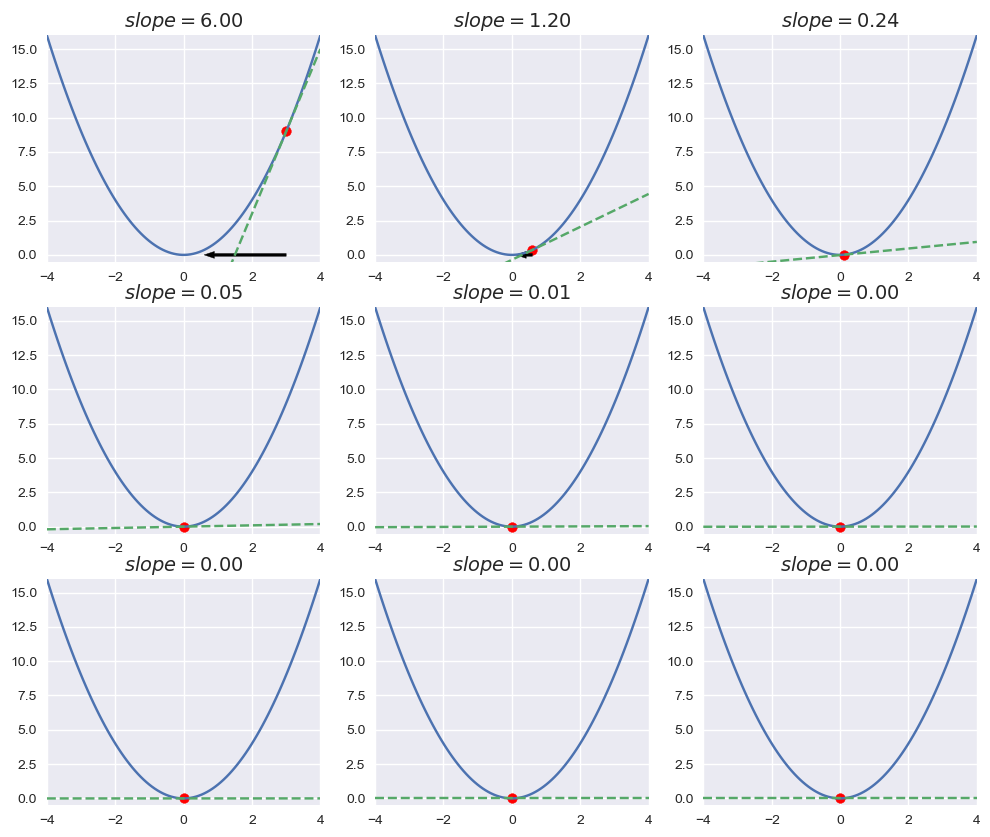

In [6]:
plt.figure(figsize=(12, 10))
m = 0
x_init = 3
for i in range(9):
    plt.subplot(3, 3, i+1)
    m = plot_function(x0=x_init, plot_direction=True, learning_rate=0.4)
    x_init = x_init - m
plt.savefig('plot4.png')

# Auto-Grad in PyTorch

How to find gradient and the slope at point $x$ with PyTorch

In [7]:
import torch

Let $y$ be the function of $x$:
$$y(x) = x^2$$

So, the grad. of $y$ is
$$\frac{dy(x)}{dx} = 2x$$

Let's set the initial point of $x$ by $2$

In [8]:
# Set the initial point of x
x = torch.tensor(2.0, requires_grad = True) # requires_grad = Do we need to get the grad from x

# Set our function
y = x**2

In [9]:
x

tensor(2., requires_grad=True)

In [10]:
# grad's value before backward => None
x.grad

In [11]:
# backward the function to find the grad.
y.backward()

Assign the $x$ value for function $y$

$$\frac{dy(x=2)}{dx} = 2\times 2 = 4$$

In [12]:
# grad's value after backward => 4
x.grad

tensor(4.)

In [13]:
# set the grad to zero again
x.grad.data.zero_()

tensor(0.)

# Experiment's gradient descent with PyTorch

We need to set the function optimized by our method.

In this case, we need to find the lowest value of $y$

In [14]:
# Set the number of step
N = 9

# Set our learning rate
lr = 0.1

# set the initail point
x = torch.tensor(4., requires_grad = True) 

# set our function that is optimized
y_fn = lambda x: x**2
y = y_fn(x)

In [15]:
cost_value = []
for i in range(N):
    y.backward(retain_graph=True)
    grad = x.grad.data
    x.data = x.data - lr * grad
    x.grad.data.zero_()
    print(f"iteration: {i}\ngrad: {grad}\nx: {x.data}\ny:{y_fn(x.data)}")
    print('='*25)
    cost_value.append(y_fn(x.data))

iteration: 0
grad: 0.0
x: 3.200000047683716
y:10.24000072479248
iteration: 1
grad: 0.0
x: 2.559999942779541
y:6.553599834442139
iteration: 2
grad: 0.0
x: 2.047999858856201
y:4.194303512573242
iteration: 3
grad: 0.0
x: 1.6383998394012451
y:2.684354066848755
iteration: 4
grad: 0.0
x: 1.3107198476791382
y:1.7179864645004272
iteration: 5
grad: 0.0
x: 1.0485758781433105
y:1.0995113849639893
iteration: 6
grad: 0.0
x: 0.8388606905937195
y:0.7036872506141663
iteration: 7
grad: 0.0
x: 0.6710885763168335
y:0.45035988092422485
iteration: 8
grad: 0.0
x: 0.5368708372116089
y:0.288230299949646


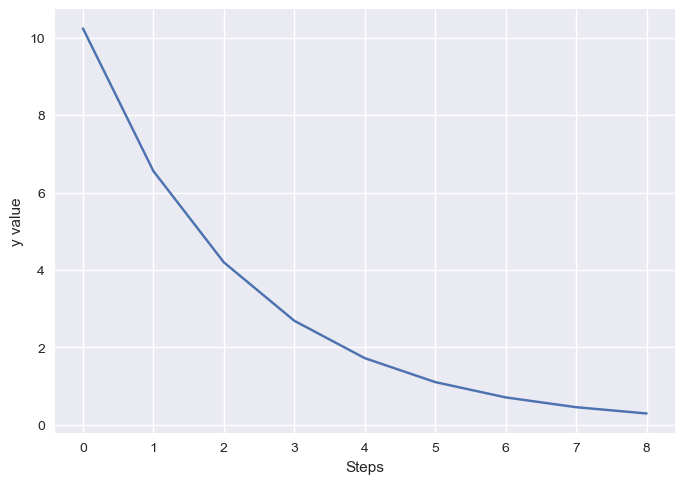

In [17]:
plt.plot(cost_value)
plt.xlabel('Steps')
plt.ylabel('y value')
plt.savefig('plot5.png')